In [1]:
import pandas as pd

df = pd.read_csv('제주지역 풍력 한시간단위실적(2019-12-01_2023-12-31).csv', encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1492 non-null   object 
 1   1시      1492 non-null   float64
 2   2시      1492 non-null   float64
 3   3시      1492 non-null   float64
 4   4시      1492 non-null   float64
 5   5시      1492 non-null   float64
 6   6시      1492 non-null   float64
 7   7시      1492 non-null   float64
 8   8시      1492 non-null   float64
 9   9시      1492 non-null   float64
 10  10시     1492 non-null   float64
 11  11시     1492 non-null   float64
 12  12시     1492 non-null   float64
 13  13시     1492 non-null   float64
 14  14시     1492 non-null   float64
 15  15시     1492 non-null   float64
 16  16시     1492 non-null   float64
 17  17시     1492 non-null   float64
 18  18시     1492 non-null   float64
 19  19시     1492 non-null   float64
 20  20시     1492 non-null   float64
 21  21시     1492 non-null   float64
 22  

In [2]:
df.head()

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2019-12-01,27.846,25.029,15.999,19.121,15.923,19.868,26.426,27.567,18.562,...,7.212,15.670,28.882,43.144,63.484,184.362,200.162,169.880,186.972,231.933
1,2019-12-02,256.605,245.428,228.624,229.361,226.257,242.204,226.189,209.256,188.624,...,214.174,223.181,207.106,201.855,189.488,189.725,181.907,195.703,209.707,221.158
2,2019-12-03,211.602,180.260,156.689,135.158,100.972,82.452,89.405,71.138,58.828,...,77.223,62.469,69.759,47.194,53.583,50.896,37.266,29.003,31.032,28.006
3,2019-12-04,31.477,43.374,56.503,59.748,63.380,69.384,73.544,50.998,24.208,...,44.691,47.141,41.533,39.029,48.980,54.743,70.900,78.205,75.357,77.805
4,2019-12-05,85.333,91.454,92.505,90.391,80.521,85.458,52.956,26.997,10.407,...,194.684,184.325,192.816,219.469,217.099,204.120,193.127,189.027,177.345,123.122


In [3]:
# 각 날짜의 평균, 토탈 발전량
df['전체 발전량'] = df['1시']+df['2시']+df['3시']+df['4시']+df['5시']+df['6시']+df['7시']+df['8시']+df['9시']+df['10시']+df['11시']+df['12시']+df['13시']+df['14시']+df['15시']+df['16시']+df['17시']+df['18시']+df['19시']+df['20시']+df['21시']+df['22시']+df['23시']+df['24시']
df['평균 발전량'] = df['전체 발전량']/24
df['전체 발전량'] = df['전체 발전량'].astype(int)
df['평균 발전량'] = df['평균 발전량'].astype(int)

# 평균, 전체 발전량을 날짜 열 바로 옆에 위치
df = df[['날짜', '평균 발전량', '전체 발전량', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']]
df.head()

,날짜,평균 발전량,전체 발전량,1시,2시,3시,4시,5시,6시,7시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2019-12-01,57,1387,27.846,25.029,15.999,19.121,15.923,19.868,26.426,...,7.212,15.670,28.882,43.144,63.484,184.362,200.162,169.880,186.972,231.933
1,2019-12-02,209,5027,256.605,245.428,228.624,229.361,226.257,242.204,226.189,...,214.174,223.181,207.106,201.855,189.488,189.725,181.907,195.703,209.707,221.158
2,2019-12-03,73,1770,211.602,180.260,156.689,135.158,100.972,82.452,89.405,...,77.223,62.469,69.759,47.194,53.583,50.896,37.266,29.003,31.032,28.006
3,2019-12-04,49,1199,31.477,43.374,56.503,59.748,63.380,69.384,73.544,...,44.691,47.141,41.533,39.029,48.980,54.743,70.900,78.205,75.357,77.805
4,2019-12-05,124,2995,85.333,91.454,92.505,90.391,80.521,85.458,52.956,...,194.684,184.325,192.816,219.469,217.099,204.120,193.127,189.027,177.345,123.122


In [4]:
# 요일별 전체 발전량, 평균 발전량 각각 히스토그램 그리기
import matplotlib.pyplot as plt
import seaborn as sns

df['날짜'] = pd.to_datetime(df['날짜'])
df['요일'] = df['날짜'].dt.day_name()
df['요일'].value_counts()


요일
Sunday       214
Monday       213
Tuesday      213
Wednesday    213
Thursday     213
Friday       213
Saturday     213
Name: count, dtype: int64

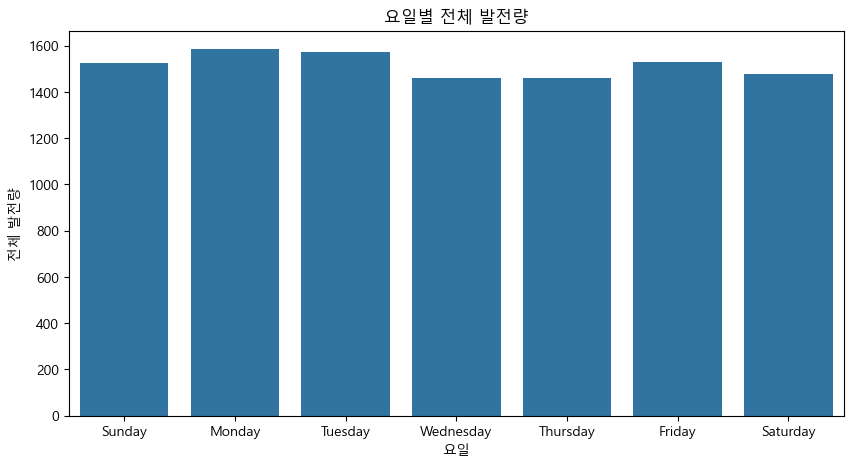

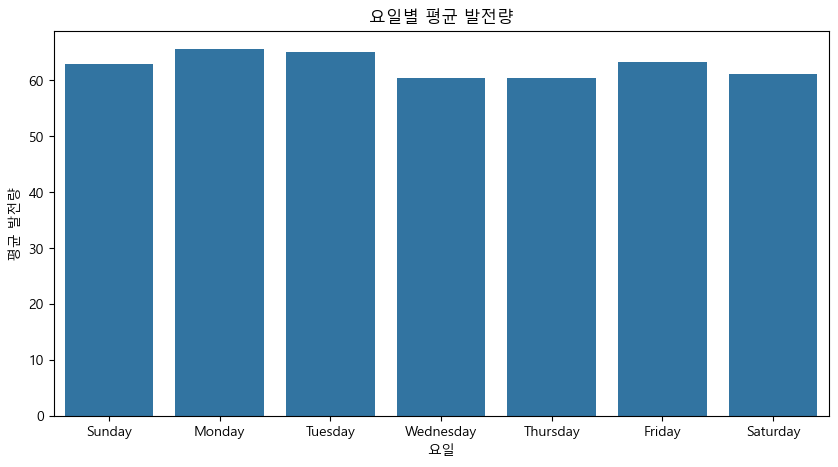

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='요일', y='전체 발전량', errorbar=None)
plt.title('요일별 전체 발전량')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='요일', y='평균 발전량', errorbar=None)
plt.title('요일별 평균 발전량')
plt.show()

In [7]:
import plotly.express as px

fig = px.scatter(df, x='요일', y='전체 발전량', title='요일별 전체 발전량')
fig.show()

fig = px.scatter(df, x='요일', y='평균 발전량', title='요일별 평균 발전량')
fig.show()

In [ ]:
# 월별 전체 발전량, 평균 발전량 각각 히스토그램 그리기
df['월'] = df['날짜'].dt.month
df['월'].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='월', y='전체 발전량', kde=True)
plt.title('월별 전체 발전량')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='월', y='평균 발전량', kde=True)
plt.title('월별 평균 발전량')
plt.show()

In [ ]:
# 시간별 전체 발전량, 평균 발전량 각각 히스토그램 그리기
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='1시', y='전체 발전량', kde=True)
plt.title('시간별 전체 발전량')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='1시', y='평균 발전량', kde=True)
plt.title('시간별 평균 발전량')
plt.show()


In [ ]:
# 상관관계 분석
df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('풍력발전 데이터 상관관계')
plt.show()

# 전체 발전량과 평균 발전량의 상관관계
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='전체 발전량', y='평균 발전량')
plt.title('전체 발전량과 평균 발전량의 상관관계')
plt.show()

# 1시간 단위 발전량과 전체 발전량의 상관관계
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='1시', y='전체 발전량')
plt.title('1시간 단위 발전량과 전체 발전량의 상관관계')
plt.show()

# 1시간 단위 발전량과 평균 발전량의 상관관계
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='1시', y='평균 발전량')
plt.title('1시간 단위 발전량과 평균 발전량의 상관관계')
plt.show()